import data: provides various functions to the user by connecting to the system. 

In [1]:
import sys
import os
# functions = "/content/drive/MyDrive/Libs"
# sys.path.append(os.path.abspath(functions))
sys.path.append('./Libs') 
import functions as F

provides access to various libraries in which functions are located and can be called upon when needed.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

sklearn-- scikit-learn- open source data analysis library. Algorithmic decision-making methods, classification: identifying and categorizing data based on patterns.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [4]:
# data = pd.read_csv('../content/drive/MyDrive/reservoir characteristics/well_logs.csv')
data = pd.read_csv('../reservoir_characteristics/datasets/well_logs.csv')
data = data.sort_values(by='Depth', ascending=True)

In [5]:
le = LabelEncoder()
data['Facies'] = le.fit_transform(data['Facies'])

In [6]:
drop_cols = ['Facies', 'Formation', 'Well Name', 'Depth']
log_names = ['GR', 'ILD_log10', 'DelthaPhi', 'PHIND', 'PE', 'NMM_M', 'RELPOS']
nor_data = F.normalization(data, drop_cols, log_names)
drop_cols = ['NMM_M']

In [7]:
nor_data.fillna(-999, inplace=True)
miss_data = F.missing_value(nor_data, 'nor_PE')
# print(miss_data)
miss_data.to_csv ('demo.csv', index = None, header=True)

In [8]:
en_data = F.encoder(miss_data)

In [9]:
selected_well = 'LUKE G U'
train = en_data.loc[en_data['Well Name'] != selected_well]
well_names_test = ['SHRIMPLIN', 'ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE', 'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE']
for i in well_names_test:
				train = en_data.loc[en_data['Well Name'] != i]
				test = en_data.loc[en_data['Well Name'] == i]
test = en_data.loc[en_data['Well Name'] == selected_well]
drop_cols = ['Facies', 'Formation', 'Well Name', 'Depth', 'formation_cat']
X = train.drop(drop_cols, axis=1)
y = train['Facies']
X_test = test.drop(drop_cols, axis=1)
y_test = test['Facies']
X_train, X_val, y_train, y_val = train_test_split(X, y,
             test_size=0.33,
						 random_state=True,
						 shuffle=y,
						 stratify=y)

In [10]:
clf_xgb = xgb.XGBClassifier(booster='gbtree', 
  learning_rate = 1.5167330688076188e-05, 
  objective = 'multi:softprob', 
  subsample = 0.5, 
  max_depth = 20,
  n_estimators = 200,
  verbosity = 1)

#learning_rate = 0.001, 
  #objective = 'multi:softprob', 
  #subsample = 0.5, 
  #max_depth = 90,
  #n_estimators = 50,
  #verbosity = 1)
  # 54.9%

In [11]:
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds = 500, eval_metric = 'merror', eval_set = [(X_train, y_train), (X_val, y_val)])

[0]	validation_0-merror:0.30690	validation_1-merror:0.40858
[1]	validation_0-merror:0.26584	validation_1-merror:0.37702
[2]	validation_0-merror:0.25349	validation_1-merror:0.37379
[3]	validation_0-merror:0.25070	validation_1-merror:0.36408
[4]	validation_0-merror:0.25269	validation_1-merror:0.36974
[5]	validation_0-merror:0.23475	validation_1-merror:0.37136
[6]	validation_0-merror:0.23595	validation_1-merror:0.36246
[7]	validation_0-merror:0.23754	validation_1-merror:0.35599


/Users/macpro_pt/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/Users/macpro_pt/Library/Python/3.9/lib/python/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-merror:0.24033	validation_1-merror:0.36003
[9]	validation_0-merror:0.23675	validation_1-merror:0.35437
[10]	validation_0-merror:0.23595	validation_1-merror:0.35032
[11]	validation_0-merror:0.23555	validation_1-merror:0.34304
[12]	validation_0-merror:0.23157	validation_1-merror:0.34709
[13]	validation_0-merror:0.23515	validation_1-merror:0.34628
[14]	validation_0-merror:0.23396	validation_1-merror:0.34385
[15]	validation_0-merror:0.23515	validation_1-merror:0.35032
[16]	validation_0-merror:0.23316	validation_1-merror:0.35113
[17]	validation_0-merror:0.23794	validation_1-merror:0.34304
[18]	validation_0-merror:0.23276	validation_1-merror:0.34709
[19]	validation_0-merror:0.23515	validation_1-merror:0.34142
[20]	validation_0-merror:0.23515	validation_1-merror:0.34385
[21]	validation_0-merror:0.23555	validation_1-merror:0.34385
[22]	validation_0-merror:0.23236	validation_1-merror:0.34628
[23]	validation_0-merror:0.23436	validation_1-merror:0.34871
[24]	validation_0-merror:0

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.5167330688076188e-05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=20, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)

In [12]:
y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print(np.unique(predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0 1 2 3 4 5 6 7 8]
Accuracy: 77.44%


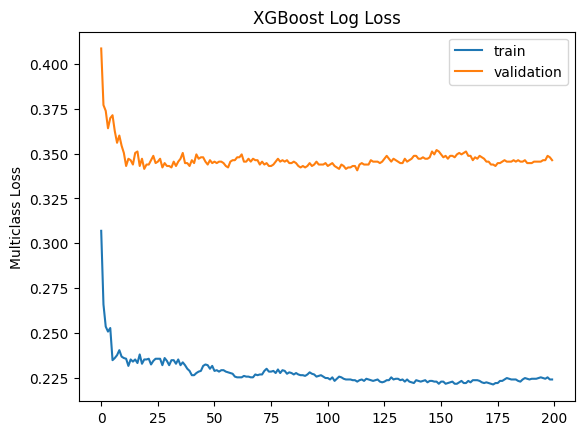

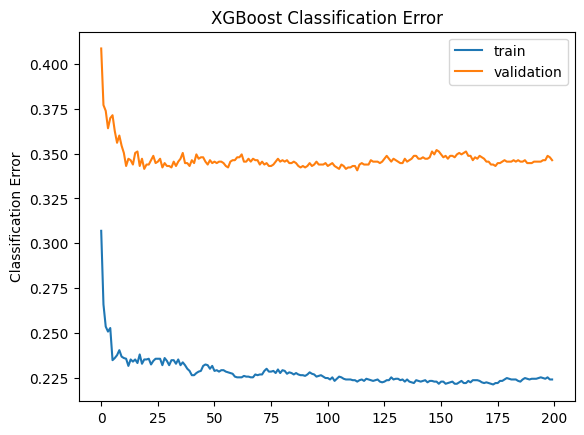

In [13]:
results =clf_xgb.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='train')
ax.plot(x_axis, results['validation_1']['merror'], label='validation')
ax.legend()
plt.ylabel('Multiclass Loss')
plt.title('XGBoost Log Loss')

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='train')
ax.plot(x_axis, results['validation_1']['merror'], label='validation')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

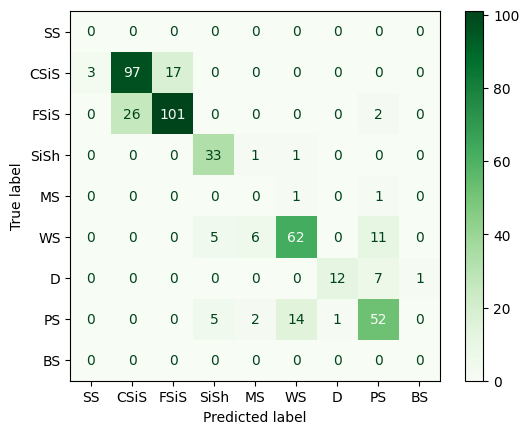

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.79      0.83      0.81       117
           2       0.86      0.78      0.82       129
           3       0.77      0.94      0.85        35
           4       0.00      0.00      0.00         2
           5       0.79      0.74      0.77        84
           6       0.92      0.60      0.73        20
           7       0.71      0.70      0.71        74
           8       0.00      0.00      0.00         0

    accuracy                           0.77       461
   macro avg       0.54      0.51      0.52       461
weighted avg       0.80      0.77      0.78       461



/Users/macpro_pt/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macpro_pt/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macpro_pt/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


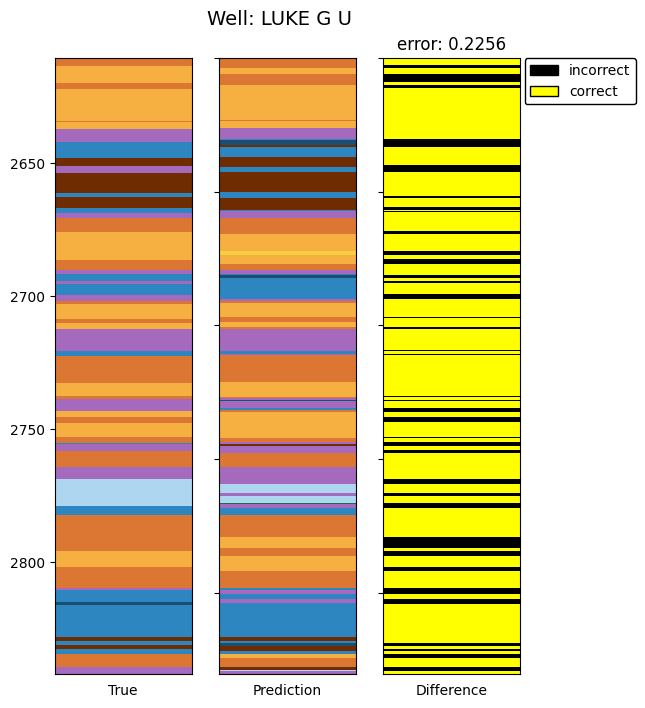

list true facies:  [1 2 3 4 5 6 7]
list prediction facies:  [0 1 2 3 4 5 6 7 8]


In [16]:
lithofacies = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']
# F.cm(y_pred, en_data, selected_well, lithofacies, 'confusion_matrix')
# print(metrics.classification_report(y_test, y_pred)), list_true_facies, list_pre_facies = F.custom_metric(test,'Facies', preds,'test')
F.cm(y_pred, en_data, selected_well, lithofacies, 'confusion_matrix')
print(metrics.classification_report(y_test, y_pred))
_, list_true_facies, list_pre_facies = F.custom_metric(test,
                                                       'Facies',
                                                       predictions,
                                                       'test')
print('list true facies: ', list_true_facies)
print('list prediction facies: ', list_pre_facies)

29


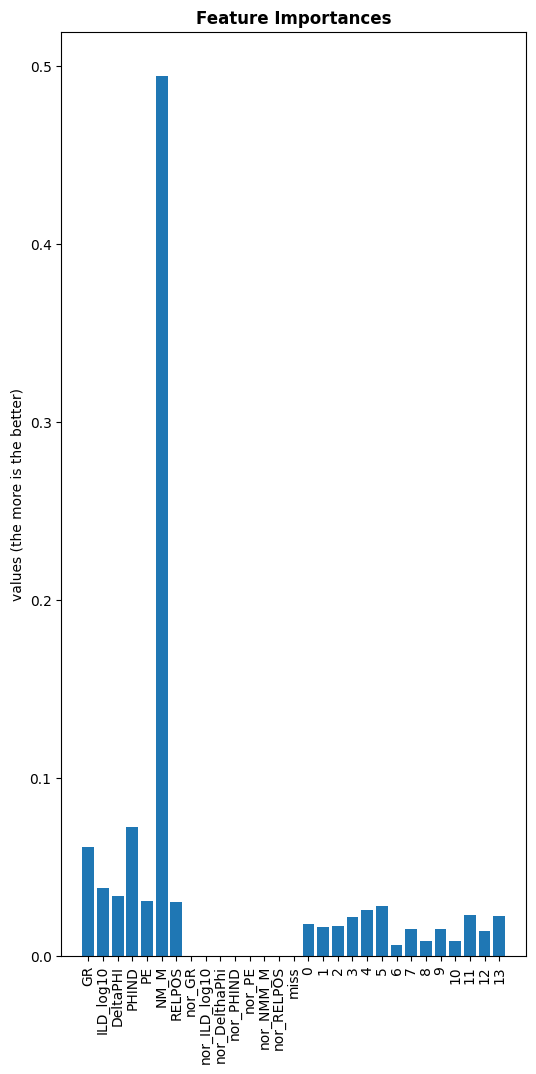

In [17]:
plt.figure(figsize=(6, 12))
plt.bar(range(len(clf_xgb.feature_importances_)), clf_xgb.feature_importances_)
print(len(clf_xgb.feature_importances_))
drop_cols_2 = ['Facies', 'Formation', 'Well Name', 'Depth', 'formation_cat'] 
new_en_data = en_data.drop(drop_cols_2, axis=1) 
labels = new_en_data.columns[:]
x = np.arange(0, len(labels), 1)
plt.xticks(x, labels, rotation=90)
plt.ylabel('values (the more is the better)')
plt.title('Feature Importances', fontweight='bold')
plt.show()